In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain

In [3]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.nnet.RNN import VanillaRNN
from genrecog.tools.trainer import RNNFbankTrainer
import torch
from torch.utils.data import TensorDataset, DataLoader 
import datetime

torch.manual_seed(0)

In [4]:
# Load dataset

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
X, y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

dataset = TensorDataset(X.to(device), y.to(device))
validation_dataset, train_dataset = torch.utils.data.random_split(dataset, (400, 3200))
test_dataset = TensorDataset(X_test.to(device), y_test.to(device))

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=400)
validation_dataloader = DataLoader(validation_dataset, shuffle=True, batch_size=400)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=400)

In [6]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model = VanillaRNN(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim,
    use_mean=False
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model

VanillaRNN(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (rnn): RNN(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [7]:
trainer = RNNFbankTrainer(
    model=model, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=100)
trainer.train()

============================== EPOCH 1 =================================
Training accuracy 31.00
Training loss 2.0010
Validation accuracy 12.00
Validation loss 2.3472
============================== EPOCH 2 =================================
Training accuracy 36.75
Training loss 1.7920
Validation accuracy 19.00
Validation loss 2.1427
============================== EPOCH 3 =================================
Training accuracy 39.06
Training loss 1.7183
Validation accuracy 34.50
Validation loss 1.8860
============================== EPOCH 4 =================================
Training accuracy 40.62
Training loss 1.6633
Validation accuracy 30.75
Validation loss 1.8398
============================== EPOCH 5 =================================
Training accuracy 42.47
Training loss 1.6189
Validation accuracy 32.75
Validation loss 1.7895
============================== EPOCH 6 =================================
Training accuracy 44.22
Training loss 1.5712
Validation accuracy 37.00
Validation loss 1.782

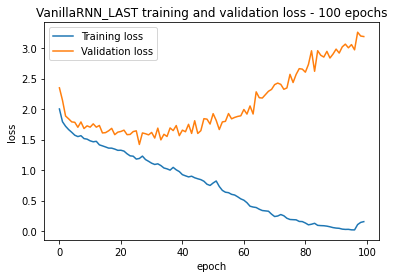

In [8]:
trainer.plot_loss("VanillaRNN_LAST training and validation loss - 100 epochs")

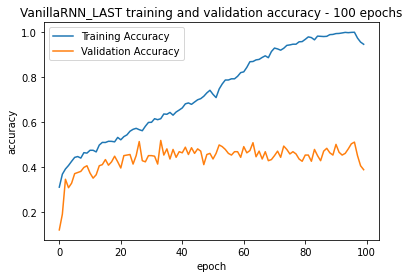

In [9]:
trainer.plot_accuracies("VanillaRNN_LAST training and validation accuracy - 100 epochs")

In [10]:
trainer.eval(test_dataloader)

(tensor([9, 7, 6, 2, 4, 7, 9, 2, 7, 8, 2, 3, 9, 2, 3, 9, 3, 3, 5, 5, 5, 9, 9, 9,
         8, 5, 0, 2, 5, 2, 5, 0, 7, 0, 7, 5, 5, 3, 9, 5, 9, 2, 3, 7, 9, 9, 4, 5,
         6, 1, 1, 9, 0, 5, 1, 5, 9, 3, 9, 7, 6, 2, 7, 0, 7, 2, 9, 5, 6, 6, 2, 4,
         3, 5, 2, 2, 4, 1, 5, 4, 9, 8, 7, 1, 9, 1, 6, 2, 5, 2, 9, 7, 0, 0, 0, 6,
         7, 5, 5, 4, 5, 7, 4, 1, 6, 8, 3, 9, 2, 6, 5, 5, 2, 5, 9, 9, 1, 4, 9, 5,
         9, 5, 9, 1, 6, 2, 9, 9, 5, 0, 1, 9, 2, 6, 6, 9, 6, 9, 5, 2, 5, 8, 3, 4,
         0, 5, 9, 0, 9, 9, 5, 2, 1, 1, 9, 0, 5, 7, 3, 9, 1, 9, 9, 6, 7, 1, 7, 9,
         2, 9, 5, 6, 0, 6, 9, 9, 6, 9, 7, 8, 6, 4, 3, 5, 8, 9, 7, 1, 9, 6, 7, 5,
         3, 0, 5, 9, 9, 9, 9, 6, 0, 7, 0, 6, 6, 8, 9, 6, 5, 5, 9, 8, 2, 4, 9, 7,
         2, 8, 5, 9, 5, 1, 7, 3, 9, 9, 3, 9, 9, 3, 8, 8, 8, 0, 9, 6, 9, 9, 7, 1,
         0, 4, 5, 7, 2, 0, 2, 6, 6, 9, 8, 2, 9, 3, 1, 5, 8, 5, 2, 1, 5, 1, 4, 0,
         9, 5, 5, 9, 9, 6, 3, 9, 7, 7, 4, 1, 7, 8, 3, 5, 1, 6, 1, 4, 5, 6, 0, 3,
         9, 6, 8, 9, 4, 1, 7

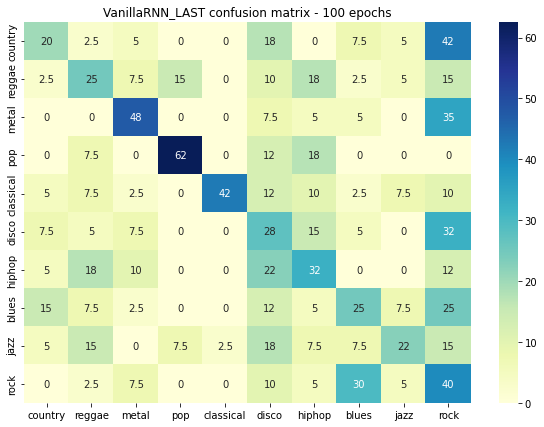

In [11]:
trainer.plot_confusion_matrix(test_dataloader, 'VanillaRNN_LAST confusion matrix - 100 epochs')

In [12]:
trainer.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.33      0.20      0.25        40
      reggae       0.28      0.25      0.26        40
       metal       0.53      0.47      0.50        40
         pop       0.74      0.62      0.68        40
   classical       0.94      0.42      0.59        40
       disco       0.18      0.28      0.22        40
      hiphop       0.28      0.33      0.30        40
       blues       0.29      0.25      0.27        40
        jazz       0.43      0.23      0.30        40
        rock       0.18      0.40      0.24        40

    accuracy                           0.34       400
   macro avg       0.42      0.35      0.36       400
weighted avg       0.42      0.34      0.36       400



In [13]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model_2 = VanillaRNN(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim,
    use_mean=False
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=lr)
model_2

VanillaRNN(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (rnn): RNN(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [14]:
trainer_2 = RNNFbankTrainer(
    model=model_2, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=30)
trainer_2.train()

============================== EPOCH 1 =================================
Training accuracy 30.22
Training loss 1.9411
Validation accuracy 14.25
Validation loss 2.2877
============================== EPOCH 2 =================================
Training accuracy 38.56
Training loss 1.7601
Validation accuracy 21.25
Validation loss 2.1176
============================== EPOCH 3 =================================
Training accuracy 41.03
Training loss 1.6971
Validation accuracy 26.75
Validation loss 1.9667
============================== EPOCH 4 =================================
Training accuracy 42.41
Training loss 1.6446
Validation accuracy 30.00
Validation loss 1.9222
============================== EPOCH 5 =================================
Training accuracy 43.09
Training loss 1.6189
Validation accuracy 31.00
Validation loss 1.8470
============================== EPOCH 6 =================================
Training accuracy 44.56
Training loss 1.5687
Validation accuracy 35.00
Validation loss 1.726

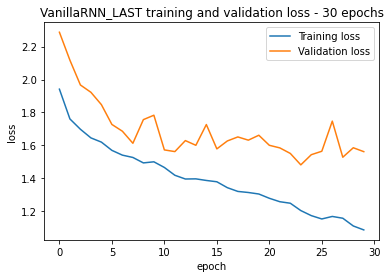

In [15]:
trainer_2.plot_loss("VanillaRNN_LAST training and validation loss - 30 epochs")

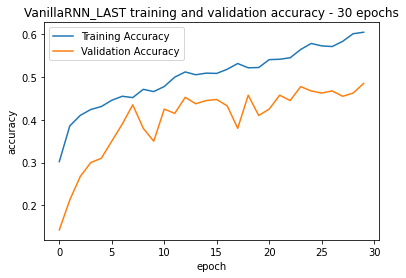

In [16]:
trainer_2.plot_accuracies("VanillaRNN_LAST training and validation accuracy - 30 epochs")

In [17]:
trainer_2.eval(test_dataloader)

(tensor([0, 8, 3, 2, 4, 7, 0, 0, 0, 1, 0, 1, 3, 7, 7, 9, 6, 3, 3, 0, 8, 5, 2, 8,
         4, 7, 7, 0, 2, 2, 8, 6, 8, 2, 5, 0, 5, 6, 6, 4, 1, 6, 7, 4, 5, 8, 6, 0,
         7, 4, 0, 0, 0, 1, 4, 7, 0, 5, 3, 2, 7, 2, 0, 0, 4, 2, 0, 2, 4, 7, 9, 4,
         5, 7, 0, 5, 4, 2, 4, 5, 0, 4, 9, 9, 1, 0, 1, 0, 4, 8, 7, 8, 7, 3, 3, 3,
         2, 5, 8, 2, 4, 5, 9, 2, 9, 5, 5, 1, 7, 9, 1, 2, 1, 0, 5, 9, 7, 5, 0, 7,
         5, 9, 0, 0, 2, 9, 2, 1, 9, 0, 5, 6, 1, 7, 3, 2, 8, 8, 4, 9, 0, 3, 0, 0,
         5, 4, 5, 6, 4, 7, 7, 7, 0, 0, 4, 9, 7, 0, 4, 0, 6, 3, 3, 3, 9, 1, 3, 0,
         1, 1, 0, 0, 2, 9, 3, 2, 7, 4, 3, 9, 6, 4, 7, 4, 5, 3, 9, 5, 9, 7, 5, 5,
         7, 6, 7, 4, 3, 4, 4, 2, 9, 2, 7, 1, 2, 5, 6, 1, 4, 5, 5, 5, 9, 9, 8, 5,
         0, 3, 5, 0, 0, 4, 0, 7, 0, 2, 2, 9, 7, 7, 2, 2, 3, 3, 4, 7, 3, 0, 7, 3,
         0, 1, 6, 3, 6, 5, 2, 2, 3, 7, 1, 2, 5, 9, 4, 9, 3, 0, 5, 5, 9, 4, 9, 4,
         1, 2, 6, 0, 2, 3, 6, 7, 9, 4, 4, 2, 5, 3, 1, 0, 5, 7, 4, 7, 9, 3, 9, 5,
         2, 8, 7, 9, 7, 4, 3

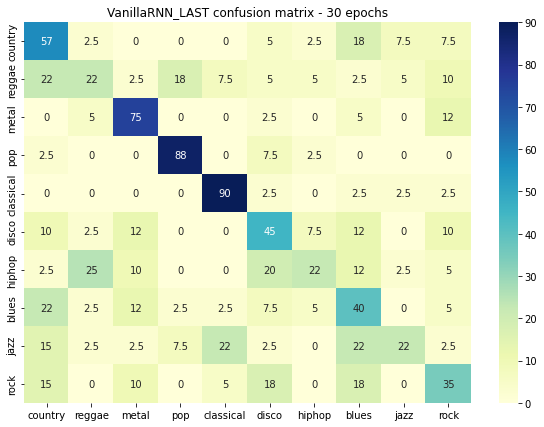

In [18]:
trainer_2.plot_confusion_matrix(test_dataloader, 'VanillaRNN_LAST confusion matrix - 30 epochs')

In [19]:
trainer_2.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.39      0.57      0.46        40
      reggae       0.36      0.23      0.28        40
       metal       0.60      0.75      0.67        40
         pop       0.76      0.88      0.81        40
   classical       0.71      0.90      0.79        40
       disco       0.39      0.45      0.42        40
      hiphop       0.50      0.23      0.31        40
       blues       0.30      0.40      0.34        40
        jazz       0.56      0.23      0.32        40
        rock       0.39      0.35      0.37        40

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.48       400
weighted avg       0.50      0.50      0.48       400

